<a href="https://colab.research.google.com/github/Bluelord/Kaggle_Courses/blob/main/03%20Data%20Visualization/05%20Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distributions

---

---

## Tutorial

---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Importing file
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [14]:
# loading data from sklearn
iris_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle_Courses/03 Data Visualization/iris.csv", index_col= 'Id')
# Print the first 5 rows of the data
iris_data

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


# Select a dataset

We'll work with a dataset of 150 different flowers, or 50 each from three different species of iris (*Iris setosa*, *Iris versicolor*, and *Iris virginica*).

![tut4_iris](https://i.imgur.com/RcxYYBA.png) 

### Histograms

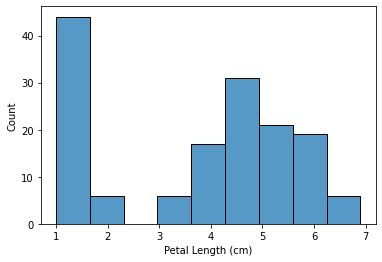

In [23]:
# Histogram 
sns.histplot(x = 'Petal Length (cm)', data = iris_data)

### Density plots

To make a KDE plot, we use the `sns.kdeplot` command.  Setting `shade=True` colors the area below the curve (_and `data=` has identical functionality as when we made the histogram above_).

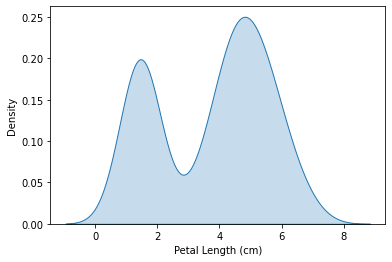

In [24]:
# KDE plot 
sns.kdeplot(data=iris_data['Petal Length (cm)'], shade=True)

### 2D KDE plots

We're not restricted to a single column when creating a KDE plot.  We can create a **two-dimensional (2D) KDE plot** with the `sns.jointplot` command.
In the plot below, the color-coding shows us how likely we are to see different combinations of sepal width and petal length, where darker parts of the figure are more likely. 

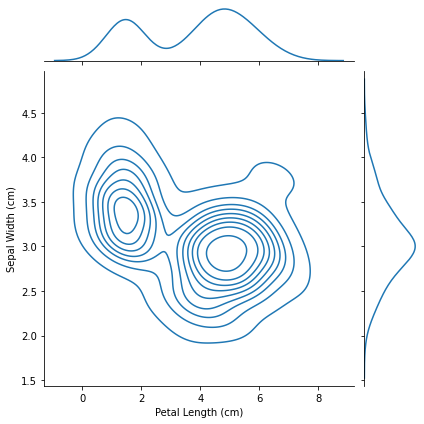

In [25]:
# 2D KDE plot
sns.jointplot(x=iris_data['Petal Length (cm)'], y=iris_data['Sepal Width (cm)'], kind="kde")

Note that in addition to the 2D KDE plot in the center,
- the curve at the top of the figure is a KDE plot for the data on the x-axis (in this case, `iris_data['Petal Length (cm)']`), and
- the curve on the right of the figure is a KDE plot for the data on the y-axis (in this case, `iris_data['Sepal Width (cm)']`).

### Color-coded plots

For the next part of the tutorial, we'll create plots to understand differences between the species.  To accomplish this, we begin by breaking the dataset into three separate files, with one for each species.

In the code cell below, we create a different histogram for each species by using the `sns.distplot` command (_as above_) three times.  We use `label=` to set how each histogram will appear in the legend.

No handles with labels found to put in legend.


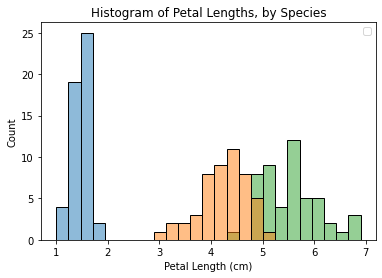

In [37]:
# Histograms for each species
sns.histplot(data=iris_data, x="Petal Length (cm)", hue="Species", bins=25)

# Add title
plt.title("Histogram of Petal Lengths, by Species")

# Force legend to appear
plt.legend()

In this case, the legend does not automatically appear on the plot. To force it to show (for any plot type), we can always use `plt.legend()`.

We can also create a KDE plot for each species by using `sns.kdeplot` (_as above_).  Again, `label=` is used to set the values in the legend.

Text(0.5, 1.0, 'Distribution of Petal Lengths, by Species')

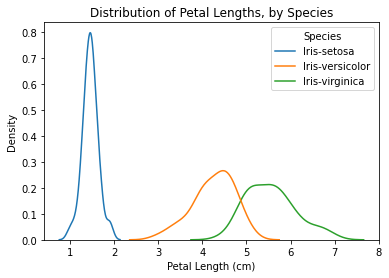

In [38]:
# KDE plots for each species
sns.kdeplot(data=iris_data, x = 'Petal Length (cm)', hue = 'Species')
# Add title
plt.title("Distribution of Petal Lengths, by Species")

One interesting pattern that can be seen in plots is that the plants seem to belong to one of two groups, where _Iris versicolor_ and _Iris virginica_ seem to have similar values for petal length, while _Iris setosa_ belongs in a category all by itself. 

In fact, according to this dataset, we might even be able to classify any iris plant as *Iris setosa* (as opposed to *Iris versicolor* or *Iris virginica*) just by looking at the petal length: if the petal length of an iris flower is less than 2 cm, it's most likely to be *Iris setosa*!

## Excercise 

---

In [68]:
# Loading data
cancer_b_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle_Courses/03 Data Visualization/cancer_b.csv", index_col = 'Id')
cancer_m_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle_Courses/03 Data Visualization/cancer_m.csv", index_col = 'Id')

In [69]:
cancer_b_data.head(5)


,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),Fractal dimension (mean),Radius (se),Texture (se),Perimeter (se),Area (se),Smoothness (se),Compactness (se),Concavity (se),Concave points (se),Symmetry (se),Fractal dimension (se),Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


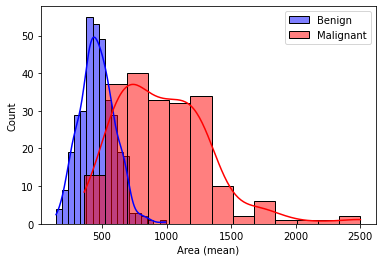

In [73]:
# Histograms for benign and maligant tumors
sns.histplot(x='Area (mean)', data = cancer_b_data, label="Benign", color = 'b' ,kde = True)
sns.histplot(x='Area (mean)', data = cancer_m_data, label="Malignant", color = 'r' ,kde = True)
plt.legend()

Do malignant tumors have higher or lower values for 'Area (mean)' (relative to benign tumors), on average?<br/>
Which tumor type seems to have a larger range of potential values?

Malignant tumors have higher values for 'Area (mean)', on average. Malignant tumors have a larger range of potential values

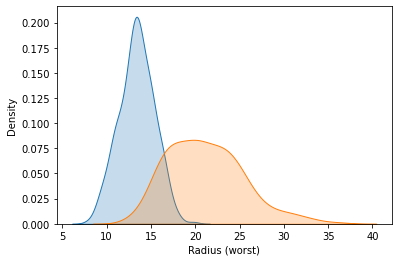

In [74]:
# KDE plots for benign and malignant tumors
sns.kdeplot(data=cancer_b_data['Radius (worst)'], shade=True)
sns.kdeplot(data=cancer_m_data['Radius (worst)'], shade=True)

A hospital has recently started using an algorithm that can diagnose tumors with high accuracy. Given a tumor with a value for 'Radius (worst)' of 25, do you think the algorithm is more likely to classify the tumor as benign or malignant?

The algorithm is more likely to classify the tumor as malignant. This is because the curve for malignant tumors is much higher than the curve for benign tumors around a value of 25 -- and an algorithm that gets high accuracy is likely to make decisions based on this pattern in the data.